In [22]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

K.set_image_dim_ordering('th')



In [23]:
from keras.optimizers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
#random seed for reproducing the same 
seed = 1234
numpy.random.seed(seed)

In [4]:
#reading data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train = x_train.reshape(x_train.shape[0],1,28,28).astype("float32")
x_test = x_test.reshape(x_test.shape[0],1,28,28).astype("float32")

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
#one hot encoding
#print(y_test[4])
y_test = np_utils.to_categorical(y_test)
#print(y_test[4])
y_train = np_utils.to_categorical(y_train)
n_classes = y_test.shape[1]
n_classes
#n_classes
#y_test.shape

10

# Tuning #.1

## hyper_param : optimizer, epoch and batch_size

In [8]:
#define model
def cnn_model(optimizer):#dropout_ratelearning_rate#optimizer):
    classifier = Sequential()
    classifier.add(Conv2D(32,(4,4), input_shape=(1,28,28), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(16,(4,4), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.3))
    classifier.add(Flatten())
    classifier.add(Dense(128,activation='relu'))
    #classifier.add(Dropout(0.3))
    classifier.add(Dense(32,activation='relu'))
    classifier.add(Dense(n_classes,activation='softmax'))
    classifier.compile(optimizer=optimizer,metrics=["accuracy"],loss="categorical_crossentropy")
    return(classifier)

In [10]:
params = { 'batch_size' : [100,200], 'epochs' : [2,3], 'optimizer' : ['adam','rmsprop'] }

#learning_rate = [0.1, 0.5]
#dropout_rate = [0.3, 0.5, 0.7]
#optimizer = ["SGD", "RMSprop", "Adam", "Adamax", "Nadam"][:1]
#optimizer = [SGD, RMSprop, Adam, Adamax]




In [55]:
#params = dict (learning_rate = learning_rate)#batch_size = batch_size,
              #epochs = epochs,
              
              #dropout_rate = dropout_rate,
              #optimizer = optimizer)



In [13]:
classifier = KerasClassifier(build_fn = cnn_model)
models = GridSearchCV(estimator = classifier, param_grid = params)

In [14]:
best_model = models.fit(x_train,y_train)
print("Best Model", best_model.best_params_)
#print("Best Accuracy", best_model.best_score_)


Epoch 1/2
40000/40000 [==============================] - 144s 4ms/step - loss: 0.4306 - acc: 0.8637
Epoch 2/2
40000/40000 [==============================] - 78s 2ms/step
Epoch 1/2
40000/40000 [==============================] - 144s 4ms/step - loss: 0.4466 - acc: 0.8592
Epoch 2/2
40000/40000 [==============================] - 78s 2ms/step
Epoch 1/2
40000/40000 [==============================] - 144s 4ms/step - loss: 0.4456 - acc: 0.8601
Epoch 2/2
40000/40000 [==============================] - 78s 2ms/step
Epoch 1/2
40000/40000 [==============================] - 152s 4ms/step - loss: 0.4161 - acc: 0.8660
Epoch 2/2
40000/40000 [==============================] - 76s 2ms/step
Epoch 1/2
40000/40000 [==============================] - 144s 4ms/step - loss: 0.4215 - acc: 0.8655
Epoch 2/2
40000/40000 [==============================] - 78s 2ms/step
Epoch 1/2
40000/40000 [==============================] - 143s 4ms/step - loss: 0.3953 - acc: 0.8756
Epoch 2/2
40000/40000 [===========================

In [15]:
#final model post hyper-param tuning

#define model
def cnn_model():
    classifier = Sequential()
    classifier.add(Conv2D(32,(4,4), input_shape=(1,28,28), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(16,(4,4), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.3))
    classifier.add(Flatten())
    classifier.add(Dense(128,activation='relu'))
    classifier.add(Dense(32,activation='relu'))
    classifier.add(Dense(n_classes,activation='softmax'))
    classifier.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
    return(classifier)
    



In [22]:
classifier = cnn_model()
history_obj = classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 3, batch_size = 100)
accuracy_scores = classifier.evaluate(x_test,y_test,verbose = 0)
print("Accuracy of the Classifier is: ", accuracy_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 197s 3ms/step - loss: 0.3465 - acc: 0.8896 - val_loss: 0.0766 - val_acc: 0.9760
Epoch 2/3
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1117 - acc: 0.9653 - val_loss: 0.0554 - val_acc: 0.9816
Epoch 3/3
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0840 - acc: 0.9735 - val_loss: 0.0415 - val_acc: 0.9867
Accuracy of the Classifier is:  98.67


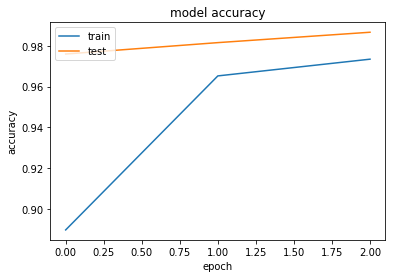

In [26]:
#accuracy
plt.plot(history_obj.history['acc'])
plt.plot(history_obj.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
print(history_obj.history.keys())
print(history_obj.history['val_acc'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.9760000056028366, 0.9816000068187714, 0.986700006723404]


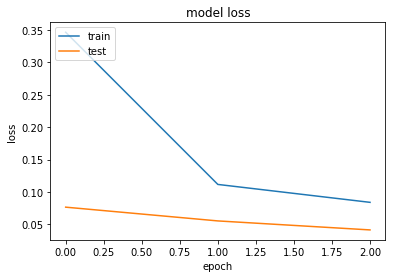

In [27]:
#loss
plt.plot(history_obj.history['loss'])
plt.plot(history_obj.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# TUNING #.2

## hyper_param : Dropouts

In [8]:
#upgraded model
def cnn_model(dropout):#dropout_ratelearning_rate#optimizer):
    classifier = Sequential()
    classifier.add(Conv2D(32,(4,4), input_shape=(1,28,28), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(16,(4,4), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(dropout))
    classifier.add(Flatten())
    classifier.add(Dense(128,activation='relu'))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(32,activation='relu'))
    classifier.add(Dense(n_classes,activation='softmax'))
    classifier.compile(optimizer='adam',metrics=["accuracy"],loss="categorical_crossentropy")
    return(classifier)

In [9]:
params = { 'dropout' : [0.3, 0.5, 0.7] }

In [10]:
classifier = KerasClassifier(build_fn = cnn_model)
models = GridSearchCV(estimator = classifier, param_grid = params)

In [11]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
best_model = models.fit(x_train,y_train,epochs = 10, batch_size = 100, callbacks=callbacks_list)
print("Best Model", best_model.best_params_)

C:\Users\soumy\Anaconda3\envs\mlcs\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
40000/40000 [==============================] - 143s 4ms/step - loss: 0.5290 - acc: 0.8296
Epoch 2/10


C:\Users\soumy\Anaconda3\envs\mlcs\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


40000/40000 [==============================] - 141s 4ms/step - loss: 0.1650 - acc: 0.9492
Epoch 3/10
40000/40000 [==============================] - 140s 4ms/step - loss: 0.1210 - acc: 0.9632
Epoch 4/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.1023 - acc: 0.9683
Epoch 5/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.0882 - acc: 0.9722
Epoch 6/10
40000/40000 [==============================] - 140s 4ms/step - loss: 0.0782 - acc: 0.9760
Epoch 7/10
40000/40000 [==============================] - 143s 4ms/step - loss: 0.0736 - acc: 0.9773
Epoch 8/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.0660 - acc: 0.9803
Epoch 9/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.0644 - acc: 0.9801
Epoch 10/10
40000/40000 [==============================] - 77s 2ms/step
Epoch 1/10
40000/40000 [==============================] - 139s 3ms/step - loss: 0.5228 - acc: 0.8342
Epoch 2/10
40000/40000 [======

40000/40000 [==============================] - 88s 2ms/step - loss: 0.3783 - acc: 0.8835
Epoch 5/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.3447 - acc: 0.8959
Epoch 6/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.3140 - acc: 0.9055
Epoch 7/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.3011 - acc: 0.9095
Epoch 8/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.2815 - acc: 0.9158
Epoch 9/10
40000/40000 [==============================] - 84s 2ms/step - loss: 0.2646 - acc: 0.9206
Epoch 10/10
40000/40000 [==============================] - 48s 1ms/step
Epoch 1/10
40000/40000 [==============================] - 89s 2ms/step - loss: 1.2884 - acc: 0.5574
Epoch 2/10
40000/40000 [==============================] - 86s 2ms/step - loss: 0.5987 - acc: 0.8098
Epoch 3/10
40000/40000 [==============================] - 85s 2ms/step - loss: 0.4599 - acc: 0.8584
Epoch 4/10
40000/40000 [===============

In [18]:
callbacks_list
#import os
#os.getcwd()

In [25]:
#with the best parameters
#dropout = 0.3
#final model post hyper-param tuning

#define model
def cnn_model():
    classifier = Sequential()
    classifier.add(Conv2D(32,(4,4), input_shape=(1,28,28), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Conv2D(16,(4,4), activation="relu"))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
    classifier.add(Dropout(0.3))
    classifier.add(Flatten())
    classifier.add(Dense(128,activation='relu'))
    classifier.add(Dropout(0.3))
    classifier.add(Dense(32,activation='relu'))
    classifier.add(Dense(n_classes,activation='softmax'))
    classifier.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
    return(classifier)

In [27]:
#csv_logger = keras.callbacks.CSVLogger('training.log')
#model.fit(X_train, Y_train, callbacks=[csv_logger])

classifier = cnn_model()
history_obj = classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10, batch_size = 100, callbacks=callbacks_list)
accuracy_scores = classifier.evaluate(x_test,y_test,verbose = 0)
print("Accuracy of the Classifier is: ", accuracy_scores[1]*100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.4220 - acc: 0.8662 - val_loss: 0.0792 - val_acc: 0.9741

Epoch 00001: val_acc improved from -inf to 0.97410, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1315 - acc: 0.9588 - val_loss: 0.0469 - val_acc: 0.9851

Epoch 00002: val_acc improved from 0.97410 to 0.98510, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0976 - acc: 0.9699 - val_loss: 0.0366 - val_acc: 0.9878

Epoch 00003: val_acc improved from 0.98510 to 0.98780, saving model to weights.best.hdf5
Epoch 4/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0803 - acc: 0.9757 - val_loss: 0.0303 - val_acc: 0.9899

Epoch 00004: val_acc improved from 0.98780 to 0.98990, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [=================

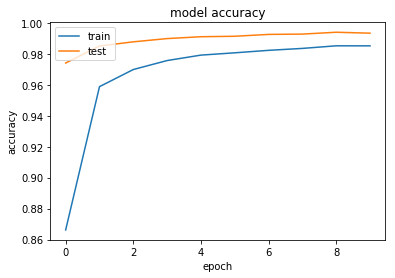

In [28]:
#accuracy
plt.plot(history_obj.history['acc'])
plt.plot(history_obj.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

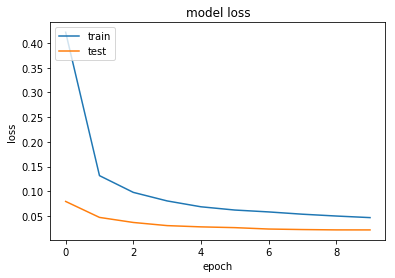

In [29]:
#loss
plt.plot(history_obj.history['loss'])
plt.plot(history_obj.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()